In [10]:
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt


dataFrame = pd.read_csv("data.csv", names=("sex", "length", "diameter", "height", "whole weight", 
                        "shucked weight", "viscera weight", "shell weight", "rings"))

sex = dataFrame["sex"]
mNumber = 0
fNumber = 0
iNumber = 0
totalRows = sex.count()
for s in sex:
    if s == "M":
        mNumber += 1
    elif s == "F":
        fNumber += 1
    elif s == "I":
        iNumber += 1

mPercent = round(mNumber / totalRows * 100, 2) 
iPercent = round(iNumber / totalRows * 100, 2) 
fPercent = round(fNumber / totalRows * 100, 2) 

distributionData = {
    "Count": [mNumber, iNumber, fNumber] ,
    "%": [mPercent, iPercent, fPercent]

}

distDf = pd.DataFrame(distributionData, index=["Male", "Infant", "Female"])
display(distDf)

,Count,%
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


In [37]:
columns = dataFrame.columns[1:9]

summaryIndexes = ["mean", "std", "min", "25%", "50%", "75%", "max"]

summaryStatistics =  {index: [] for index in summaryIndexes}

for columnNumber in range(0, len(columns)):
    currColumn = dataFrame[columns[columnNumber]]
    summaryStatistics["mean"].append(currColumn.mean())
    summaryStatistics["std"].append(currColumn.std())
    summaryStatistics["min"].append(currColumn.min())
    summaryStatistics["25%"].append(currColumn.quantile(0.25))
    summaryStatistics["50%"].append(currColumn.quantile(0.5))
    summaryStatistics["75%"].append(currColumn.quantile(0.75))
    summaryStatistics["max"].append(currColumn.max())

summaryDf = pd.DataFrame(summaryStatistics, index=columns)
display(summaryDf)




,mean,std,min,25%,50%,75%,max
length,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
diameter,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
height,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
whole weight,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
shucked weight,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
viscera weight,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
shell weight,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
rings,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


<AxesSubplot: title={'center': 'Occurrences of each category for the qualitative variable'}, xlabel='sex', ylabel='count'>

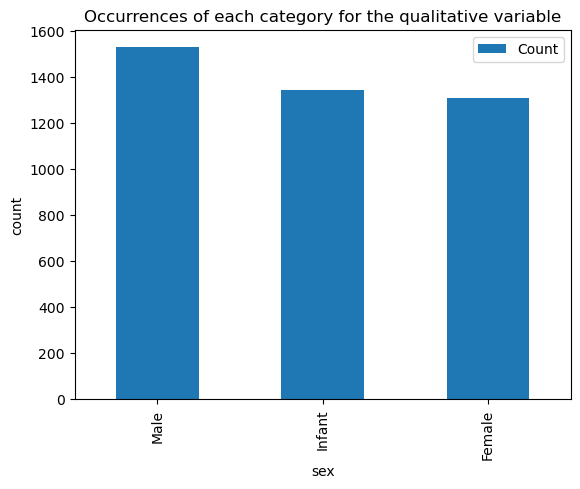

In [38]:
distChart = distDf.plot.bar(y="Count", title="Occurrences of each category for the qualitative variable", 
                            ylabel="count", xlabel="sex")
display(distChart)

array([[<AxesSubplot: title={'center': 'length'}>,
        <AxesSubplot: title={'center': 'diameter'}>,
        <AxesSubplot: title={'center': 'height'}>,
        <AxesSubplot: title={'center': 'whole weight'}>],
       [<AxesSubplot: title={'center': 'shucked weight'}>,
        <AxesSubplot: title={'center': 'viscera weight'}>,
        <AxesSubplot: title={'center': 'shell weight'}>,
        <AxesSubplot: title={'center': 'rings'}>]], dtype=object)

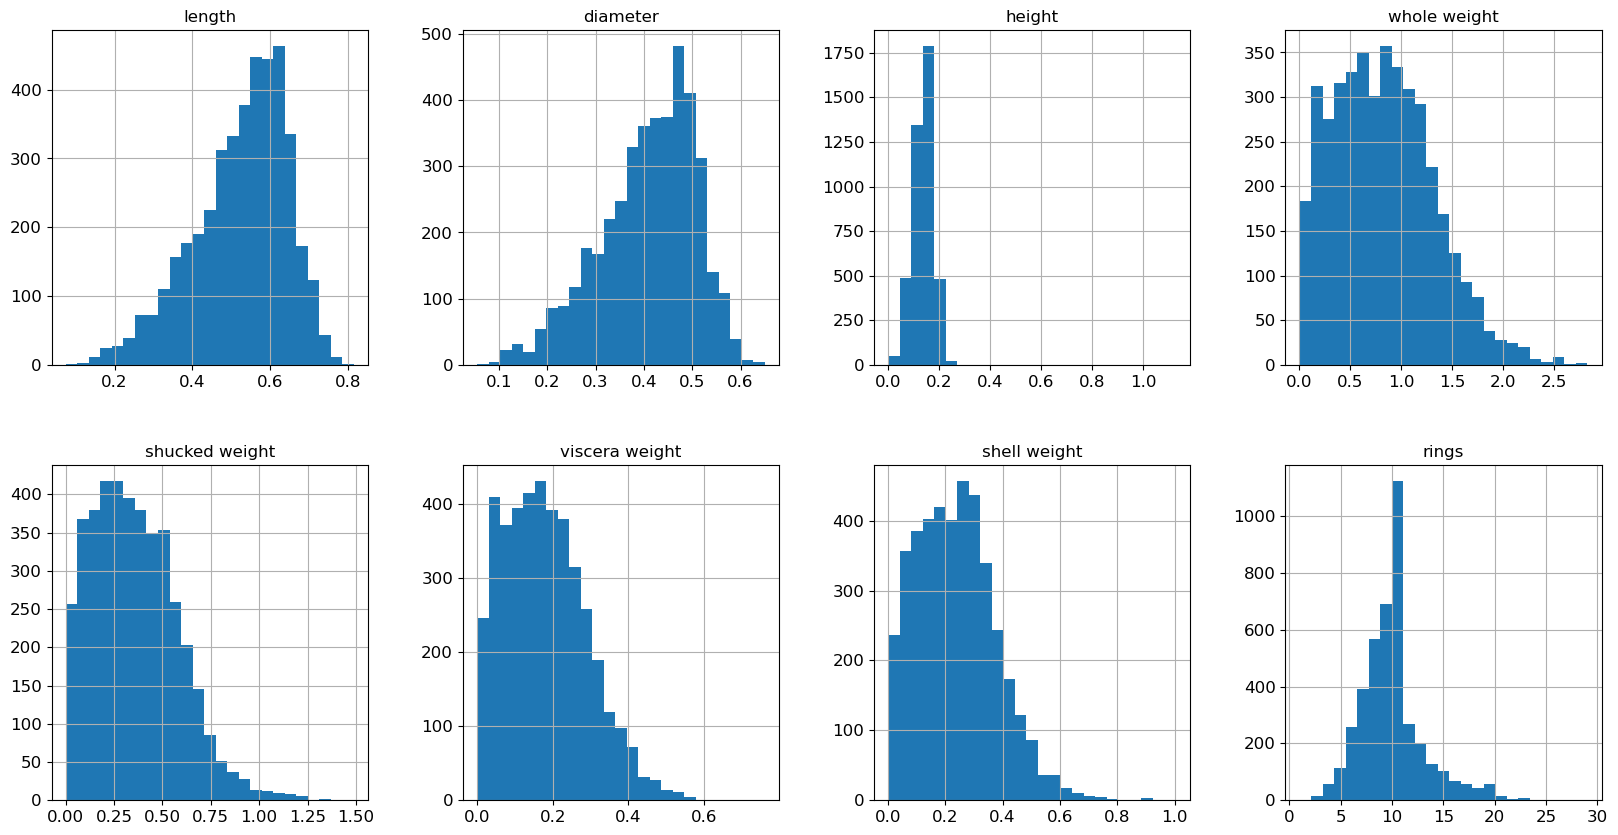

In [12]:


dfHist = dataFrame.hist(layout=(2, 4), figsize=(20, 10), xlabelsize=12, ylabelsize=12, bins=25)
display(dfHist)

Column number: diameter
Start column: length

Column number: height
Start column: length

Column number: whole weight
Start column: length

Column number: shucked weight
Start column: length

Column number: viscera weight
Start column: length

Column number: shell weight
Start column: length

Column number: rings
Start column: length

Column number: height
Start column: diameter

Column number: whole weight
Start column: diameter

Column number: shucked weight
Start column: diameter

Column number: viscera weight
Start column: diameter

Column number: shell weight
Start column: diameter

Column number: rings
Start column: diameter

Column number: whole weight
Start column: height

Column number: shucked weight
Start column: height

Column number: viscera weight
Start column: height

Column number: shell weight
Start column: height

Column number: rings
Start column: height

Column number: shucked weight
Start column: whole weight

Column number: viscera weight
Start column: whole weigh

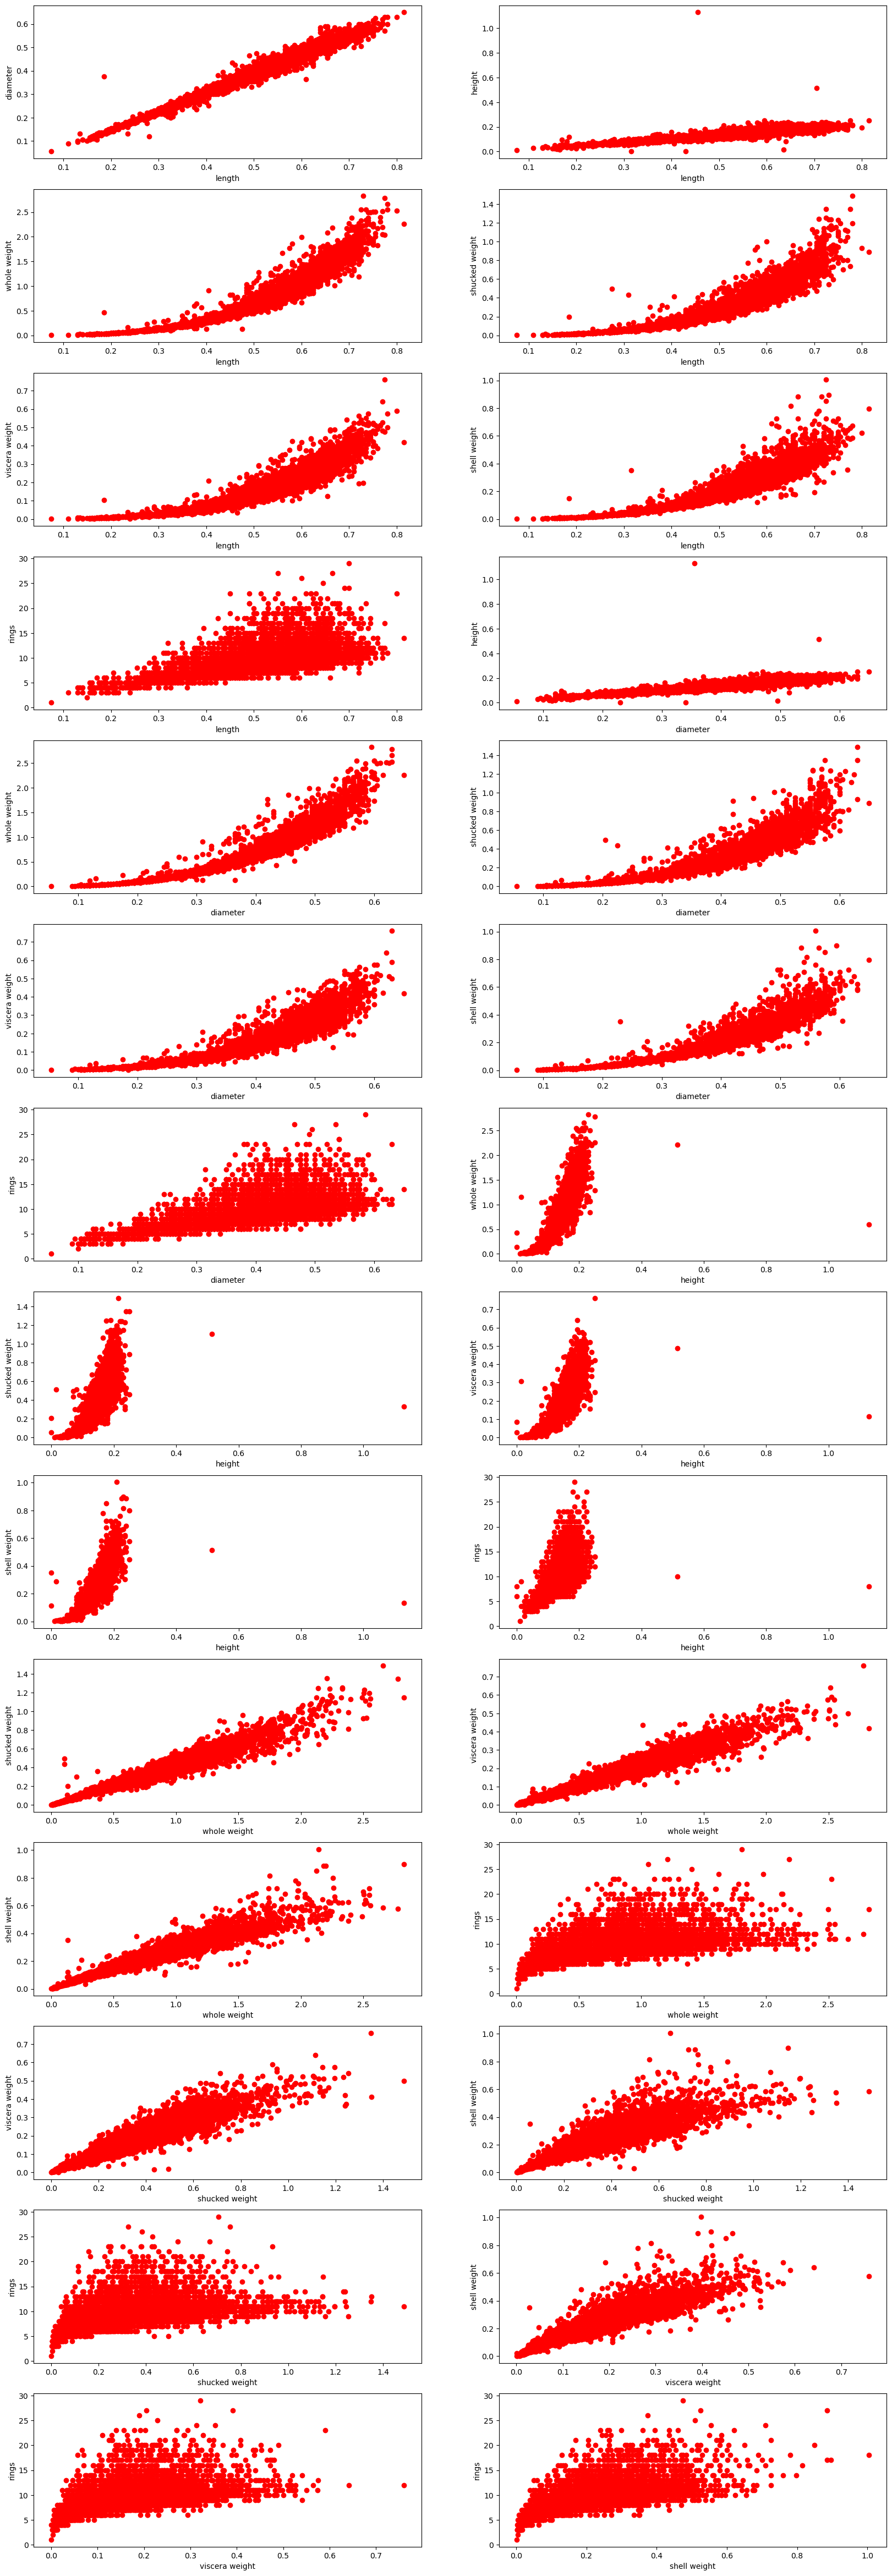

In [33]:
axes = []

#axes.append(dataFrame.plot.scatter(x="length", y="diameter", c="blue"))

startColumn = 0
endColumn = len(columns) - 1

#print(dataFrame.index(0))
fig, ax = plt.subplots(14, 2, figsize=(20, 60))

startAxisX = 0
startAxisY = 0
for currStartColumn in range(startColumn, endColumn):
    for currColumnNumber in range(currStartColumn + 1, len(columns)):
        currStartColumnName = columns[currStartColumn]
        currColumnNumberName = columns[currColumnNumber]
        print("Column number: " + str(currColumnNumberName))
        print("Start column: " + str(currStartColumnName))
        print()
        ax[startAxisX, startAxisY].scatter(x=dataFrame[currStartColumnName], y=dataFrame[currColumnNumberName], c="red")
        ax[startAxisX, startAxisY].set_xlabel(currStartColumnName)
        ax[startAxisX, startAxisY].set_ylabel(currColumnNumberName)
        startAxisY += 1
        if startAxisY == 2:
            startAxisY = 0
            startAxisX += 1

plt.show()
    #for columnNumber in range(currStartColumn, len(columns) - 1):
    #    axes.append(dataFrame.plot.scatter(x=columns[currStartColumn], y=columns[currStartColumn + 1], c="red"))

#display(axes)

In [40]:
# default method - Pearson's Correlation
corelation = dataFrame.corr()
display(corelation)

/tmp/ipykernel_172854/437839464.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation = dataFrame.corr()


,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000
